<a href="https://colab.research.google.com/github/Chandrika-s1313/GeeksForGeeks/blob/main/moviereviewsentimentanalysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
imdb=pd.read_csv('./Train.csv')
print(imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
None


First, we'll reduce the data set to 10% and then we'll keep 50% for the training set and 25% both for the validation and the test set.

In [ ]:
from sklearn.model_selection import train_test_split

features = imdb.drop("label",axis=1)
labels = imdb["label"]

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.90, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=42)

print("Data distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(y_train),len(y_val),len(y_test)))

Data distribution:
- Train: 2000 
- Validation: 1000 
- Test: 1000


# DATA PRE-PROCESSING
-Tokenize sentences
-Remove capital letters
-Remove stopwords
-Remove non-alphanumeric characters
-Lemmatize the tokens

In [ ]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

We create lists for positive and negative words and then visualize the most common ones with WordClouds.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processing data...
Creating word clouds...


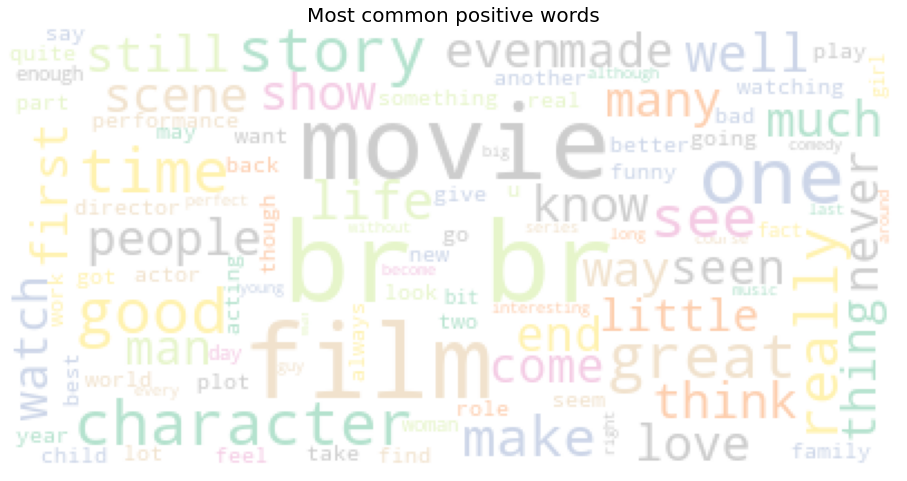

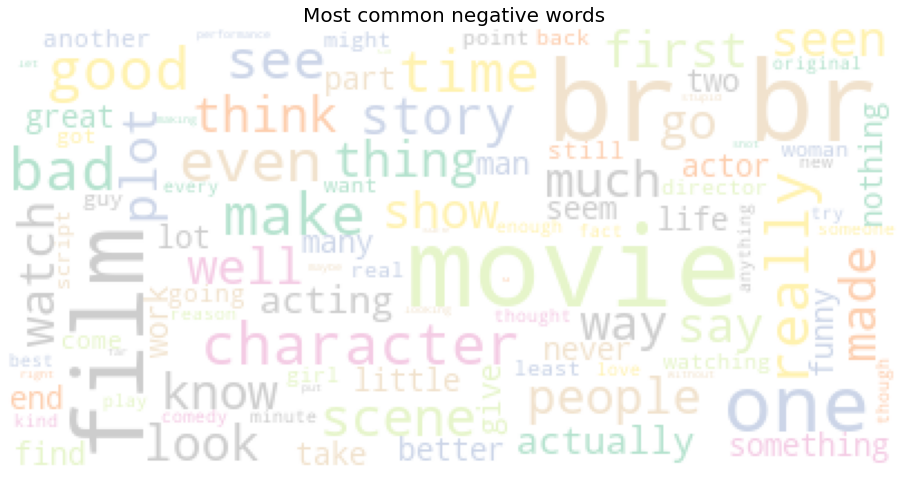

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')

imdb=imdb.head(1000)
print("Processing data...")
imdb['clean']=imdb['text'].map(clean)
imdb['clean_text']=imdb['clean'].apply(lambda x: " ".join([str(word) for word in x]))

print("Creating word clouds...")
positive_words=" ".join(imdb[imdb.label==1]['clean_text'].values)
negative_words=" ".join(imdb[imdb.label==0]['clean_text'].values)

generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")

from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean)
tfidf_vect_fit=tfidf_vect.fit(X_train['text'])X_train=vectorize(X_train['text'],tfidf_vect_fit)

SyntaxError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,y_train.values.ravel(),cv=5)

In [ ]:
print(scores)
scores.mean()

[0.8125 0.7925 0.77   0.81   0.8225]


0.8015000000000001

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(X_train,y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 100}

0.572 (+/-0.134) for {'max_depth': 2, 'n_estimators': 5}
0.673 (+/-0.036) for {'max_depth': 2, 'n_estimators': 50}
0.716 (+/-0.037) for {'max_depth': 2, 'n_estimators': 100}
0.652 (+/-0.029) for {'max_depth': 10, 'n_estimators': 5}
0.752 (+/-0.022) for {'max_depth': 10, 'n_estimators': 50}
0.796 (+/-0.023) for {'max_depth': 10, 'n_estimators': 100}
0.636 (+/-0.039) for {'max_depth': 20, 'n_estimators': 5}
0.772 (+/-0.025) for {'max_depth': 20, 'n_estimators': 50}
0.801 (+/-0.028) for {'max_depth': 20, 'n_estimators': 100}
0.684 (+/-0.049) for {'max_depth': None, 'n_estimators': 5}
0.779 (+/-0.019) for {'max_depth': None, 'n_estimators': 50}
0.799 (+/-0.024) for {'max_depth': None, 'n_estimators': 100}


In [ ]:
cv.best_estimator_

RandomForestClassifier(max_depth=20)

In [ ]:
X_val=vectorize(X_val['text'],tfidf_vect_fit)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=20)
rf1.fit(X_train, y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf2.fit(X_train, y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=5)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val,y_pred), 3)
    precision = round(precision_score(y_val,y_pred), 3)
    recall = round(recall_score(y_val,y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 20 / # OF EST: 100 -- A: 0.814 / P: 0.805 / R: 0.818
MAX DEPTH: None / # OF EST: 100 -- A: 0.816 / P: 0.827 / R: 0.789
MAX DEPTH: None / # OF EST: 5 -- A: 0.671 / P: 0.656 / R: 0.689


The best model is the second one

So now we will evaluate the best model on the test set

In [ ]:
X_test=vectorize(X_test['text'],tfidf_vect_fit)

y_pred = rf2.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred), 3)
precision = round(precision_score(y_test,y_pred), 3)
recall = round(recall_score(y_test,y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf3.max_depth,
                                                                     rf3.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

TypeError: ignored

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None
(5000, 2)
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0
5  I saw this film on September 1st, 2005 in Indi...      1
6  I saw a screening of this movie last night. I ...      0
7  William Hurt may not be an American matinee id...      1
8  IT IS A PIECE OF CRAP! not funny at all. durin...      0
9  I'M BOUT IT(1997)<br /><br />Developed & publi...      0


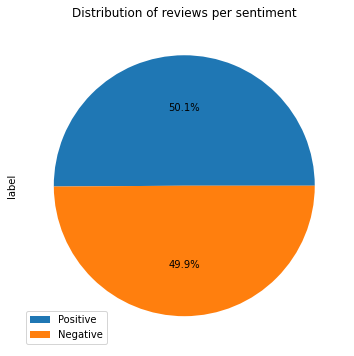

In [ ]:
imdb=pd.read_csv('./Test.csv')
print(imdb.info())
print(imdb.shape)
print(imdb.head(10))

imdb['label'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')